# Pré-processamento de dados

🎧 Iremos aplicar os conhecimentos aprendidos na aula em um conjunto de dados musical. Quem aí gosta de música?? 🎶
Prepare seu fone de ouvido (ou só o Python mesmo 😄), porque hoje vamos explorar dados sobre músicas de diferentes gêneros, batidas, popularidade e muito mais!

Ao longo desse notebook, vamos:

- Limpar ruídos (e não estamos falando só de música alta, hein 🎵)
- Detectar valores ausentes como se fossem notas faltando em uma melodia
- Entender outliers que destoam como aquele solo inesperado
- Codificar variáveis categóricas — sim, transformar “gênero musical” em números não precisa ser um bicho de sete cabeças!
- E ajustar nossos dados com normalização/padronização pra deixar tudo no mesmo tom 🎼


Os dados foram retirados do Spotify e você consegue vê-los no Kaggle [clicando aqui](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre)

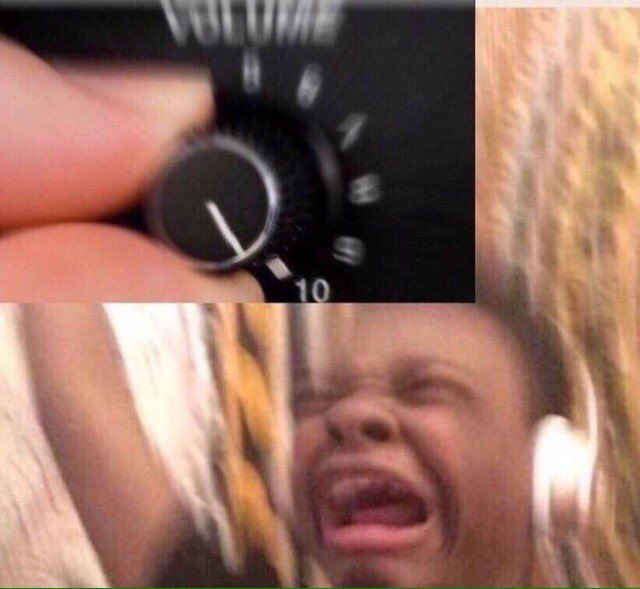



---



## Importanto as bibliotecas 🥰

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

## 📚 Lendo os dados

In [17]:
df = pd.read_csv('/content/music_genre.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [18]:
df.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [19]:
df.shape

(50005, 18)

## 🧩 Verificando os nulos

Missing values (ou valores ausentes) são dados que estão faltando em uma ou mais colunas de um conjunto de dados. Podem aparecer como:

- NaN (Not a Number)
- None
- Celulas vazias
- Zeros (⚠️ em alguns contextos podem ser considerados missing, mas nem sempre!)

In [20]:
faltantes = pd.DataFrame({'colunas':df.columns,
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':(df.isna().sum()/df.shape[0])*100,
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,instance_id,instance_id,float64,5,0.009999,50000
1,artist_name,artist_name,object,5,0.009999,6863
2,track_name,track_name,object,5,0.009999,41699
3,popularity,popularity,float64,5,0.009999,99
4,acousticness,acousticness,float64,5,0.009999,4193
5,danceability,danceability,float64,5,0.009999,1088
6,duration_ms,duration_ms,float64,5,0.009999,26028
7,energy,energy,float64,5,0.009999,2085
8,instrumentalness,instrumentalness,float64,5,0.009999,5131
9,key,key,object,5,0.009999,12


In [21]:
df[df.artist_name.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver que são ruidos então podemos deleta-los.

### Lidando com os nulos

In [22]:
df_cp = df.dropna()

In [23]:
df_cp.shape

(50000, 18)

In [24]:
df.shape

(50005, 18)

mostrando outra alternativa de lidar com os nulos

In [25]:
df_preenchid = df.copy()

In [26]:
df_preenchid['artist_name'] = df_preenchid['artist_name'].fillna(df_preenchid['artist_name'].mode()[0])


In [27]:
df_preenchid[df_preenchid.artist_name.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


In [28]:
df_preenchid[df_preenchid.instance_id.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_preenchid['acousticness'] = df_preenchid['acousticness'].fillna(df_preenchid['acousticness'].median())


In [31]:
df_preenchid[df_preenchid.instance_id.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para variáveis do tipo float ou int fica a seu critério usar a mediana ou a média. Tudo vai depender do significado da variável e também se há presença de outliers

In [32]:
df_preenchid['popularity'] = df_preenchid['popularity'].fillna(df_preenchid['popularity'].median())
df_preenchid['danceability'] = df_preenchid['danceability'].fillna(df_preenchid['danceability'].median())
df_preenchid['duration_ms'] = df_preenchid['duration_ms'].fillna(df_preenchid['duration_ms'].median())
df_preenchid['energy'] = df_preenchid['energy'].fillna(df_preenchid['energy'].median())
df_preenchid['instrumentalness'] = df_preenchid['instrumentalness'].fillna(df_preenchid['instrumentalness'].median())
df_preenchid['liveness'] = df_preenchid['liveness'].fillna(df_preenchid['liveness'].median())
df_preenchid['loudness'] = df_preenchid['loudness'].fillna(df_preenchid['loudness'].median())
df_preenchid['speechiness'] = df_preenchid['speechiness'].fillna(df_preenchid['speechiness'].median())
df_preenchid['valence'] = df_preenchid['valence'].fillna(df_preenchid['valence'].median())
df_preenchid['acousticness'] = df_preenchid['acousticness'].fillna(df_preenchid['acousticness'].median())



Variáveis do tipo string sempre substitua pela Moda

In [33]:
df_preenchid['key'] = df_preenchid['key'].fillna(df_preenchid['key'].mode()[0])


In [34]:
df_preenchid['mode'] = df_preenchid['mode'].fillna(df_preenchid['mode'].mode()[0])


In [35]:
df_preenchid['music_genre'] = df_preenchid['music_genre'].fillna(df_preenchid['music_genre'].mode()[0])


In [36]:
df_preenchid[df_preenchid.instance_id.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,empty_field,NaN,45.0,0.306383,0.568,219281.0,0.643,0.000158,G,0.126,-7.2765,Major,0.0489,NaN,NaN,0.448,Alternative
10001,NaN,empty_field,NaN,45.0,0.306383,0.568,219281.0,0.643,0.000158,G,0.126,-7.2765,Major,0.0489,NaN,NaN,0.448,Alternative
10002,NaN,empty_field,NaN,45.0,0.306383,0.568,219281.0,0.643,0.000158,G,0.126,-7.2765,Major,0.0489,NaN,NaN,0.448,Alternative
10003,NaN,empty_field,NaN,45.0,0.306383,0.568,219281.0,0.643,0.000158,G,0.126,-7.2765,Major,0.0489,NaN,NaN,0.448,Alternative
10004,NaN,empty_field,NaN,45.0,0.306383,0.568,219281.0,0.643,0.000158,G,0.126,-7.2765,Major,0.0489,NaN,NaN,0.448,Alternative


Perceberam que estamos criando dados sintéticos? Informações de musicas que na verdade não existem. Então tomem muito cuidado!

Isso pode criar um modelo que foi treinado com musicas que não existem.



## 📝 Ajustando o formato dos dados

A variável "tempo" esá no formato de string mas na verdade deveria ser do tipo float

In [37]:
df_preenchid.tempo.unique()

array(['100.889', '115.00200000000001', '127.994', ..., '112.97',
       '167.655', '99.20100000000001'], dtype=object)

In [38]:
df_preenchid.tempo = df_preenchid.tempo.astype(float)

ValueError: could not convert string to float: '?'

Olha só....encontramos um Missing value só que com um outro formato fora do "padrão". Isso pode acontecer bastante, e o primeiro passo que indico é transformar isso em NaN, que é o formato mais correto

In [39]:
df_preenchid.tempo = df_preenchid.tempo.replace({'?':np.nan})

In [40]:
df_preenchid.tempo = df_preenchid.tempo.astype(float)

In [41]:
df_preenchid['tempo'] = df_preenchid['tempo'].fillna(df_preenchid['tempo'].median())


Esse mesmo processo será aplicado para o dataframe que deletamos os nulos

In [42]:
df_cp.tempo = df_cp.tempo.replace({'?':np.nan})

<ipython-input-42-e14fc9722010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp.tempo = df_cp.tempo.replace({'?':np.nan})


In [43]:
df_cp.tempo = df_cp.tempo.astype(float)

<ipython-input-43-1e84cd2359ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp.tempo = df_cp.tempo.astype(float)


In [44]:
df_cp['tempo'] = df_cp['tempo'].fillna(df_cp['tempo'].median())


<ipython-input-44-ef04a7fcb22a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp['tempo'] = df_cp['tempo'].fillna(df_cp['tempo'].median())


In [45]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float64
 17

In [46]:
df_preenchid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50005 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50005 non-null  float64
 4   acousticness      50005 non-null  float64
 5   danceability      50005 non-null  float64
 6   duration_ms       50005 non-null  float64
 7   energy            50005 non-null  float64
 8   instrumentalness  50005 non-null  float64
 9   key               50005 non-null  object 
 10  liveness          50005 non-null  float64
 11  loudness          50005 non-null  float64
 12  mode              50005 non-null  object 
 13  speechiness       50005 non-null  float64
 14  tempo             50005 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50005 non-null  float6

Agora todos estão no formato certo.... NÃO. Sempre cheque todos os conteúdos

In [47]:
df_cp.artist_name.unique()

array(['Röyksopp', 'Thievery Corporation', 'Dillon Francis', ...,
       'Darshan Raval', 'Powers Pleasant', 'Millonario'], dtype=object)

In [48]:
df_cp[df_cp.artist_name=='empty_field']

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
19,66905.0,empty_field,7th Sevens,50.0,0.02810,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,4-Apr,0.1990,Electronic
25,36047.0,empty_field,Revolution,34.0,0.02360,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,4-Apr,0.4180,Electronic
44,37340.0,empty_field,World (The Price Of Love) - [Radio Edit] [2015...,31.0,0.00350,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.610,4-Apr,0.8410,Electronic
128,61549.0,empty_field,Down With Me - VIP,32.0,0.01390,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,4-Apr,0.1790,Electronic
135,38747.0,empty_field,Olvidela Compa,44.0,0.15300,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.013,4-Apr,0.4760,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49942,39113.0,empty_field,Undecided,50.0,0.05480,0.754,132414.0,0.840,0.000014,A,0.1500,-5.111,Major,0.3130,144.991,4-Apr,0.0397,Hip-Hop
49956,37037.0,empty_field,What You Like (feat. Ty Dolla $ign & Wiz Khalifa),52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,4-Apr,0.8570,Hip-Hop
49971,48746.0,empty_field,Blast,51.0,0.12400,0.786,187027.0,0.738,0.000000,C,0.1400,-5.621,Major,0.3890,93.758,4-Apr,0.7800,Hip-Hop
49991,40401.0,empty_field,For Real,53.0,0.00392,0.770,211820.0,0.905,0.000003,F,0.1690,-8.235,Minor,0.1440,135.999,4-Apr,0.4640,Hip-Hop


## 🖇️ Ajustando as duplicidades

In [49]:
df_cp[df_cp.track_name.duplicated()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
390,41528.0,Portishead,Only You,48.0,0.34400,0.572,299573.0,0.323,0.00742,F,0.1620,-12.335,Major,0.2230,118.106,4-Apr,0.104,Electronic
441,89702.0,Lookas,Eclipse,36.0,0.03770,0.515,193600.0,0.938,0.77000,A,0.1960,-3.823,Major,0.0481,150.059,4-Apr,0.357,Electronic
522,42537.0,Rusko,Everyday,27.0,0.00726,0.487,-1.0,0.972,0.26900,D#,0.1080,-6.259,Minor,0.0385,140.041,4-Apr,0.427,Electronic
577,87026.0,Valentino Khan,Hello,36.0,0.00410,0.526,198109.0,0.990,0.86400,G,0.0967,-1.441,Major,0.1050,127.912,4-Apr,0.416,Electronic
603,42401.0,Herobust,No Time,27.0,0.00554,0.609,188800.0,0.888,0.00544,B,0.7670,-1.692,Major,0.0639,150.043,4-Apr,0.354,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,37756.0,Lecrae,Cry For You,54.0,0.30400,0.642,263467.0,0.353,0.00000,A#,0.0927,-12.384,Minor,0.2150,89.596,4-Apr,0.276,Hip-Hop
49997,54580.0,Tee Grizzley,First Day Out,75.0,0.17100,0.587,254694.0,0.711,0.00000,C#,0.1250,-6.330,Major,0.4200,98.008,4-Apr,0.381,Hip-Hop
49998,64552.0,Logic,Growing Pains III,55.0,0.47400,0.514,246773.0,0.730,0.00000,E,0.5110,-8.491,Minor,0.3870,167.655,4-Apr,0.699,Hip-Hop
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.1190,-7.022,Major,0.2980,98.028,4-Apr,0.330,Hip-Hop


podemos mostrar todas as linhas estão duplicadas incluindo o parametro `keep=False`


In [50]:
df_cp[df_cp.track_name.duplicated(keep=False)].sort_values(by='track_name')

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
14829,77103.0,Lemon Jelly,'75 aka Stay With You,52.0,0.03070,0.712,371507.0,0.8270,0.795000,C#,0.122,-7.331,Major,0.0414,126.001,4-Apr,0.305,Jazz
4096,71962.0,Lemon Jelly,'75 aka Stay With You,51.0,0.03070,0.712,371507.0,0.8270,0.795000,C#,0.122,-7.331,Major,0.0414,126.001,4-Apr,0.305,Electronic
13660,29723.0,Jamiroquai,(Don't) Give Hate a Chance,48.0,0.01360,0.701,300227.0,0.8360,0.000081,D,0.197,-7.243,Major,0.0337,127.871,4-Apr,0.812,Jazz
4030,20598.0,empty_field,(Don't) Give Hate a Chance,48.0,0.01360,0.701,300227.0,0.8360,0.000081,D,0.197,-7.243,Major,0.0337,127.871,4-Apr,0.812,Electronic
31650,45147.0,Millie Jackson,(If Loving You Is Wrong) I Don't Want To Be Right,32.0,0.05590,0.519,237800.0,0.4580,0.000000,E,0.162,-11.702,Minor,0.0585,131.697,4-Apr,0.328,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42701,62460.0,Joe Hisaishi,海の見える街 - スーパー・サウンド・コレクション Vol.2 魔女の宅急便組曲,38.0,0.96700,0.595,170827.0,0.2610,0.890000,E,0.353,-10.725,Minor,0.0258,119.879,4-Apr,0.479,Classical
8331,36885.0,Nobuyuki Tsujii,花水木の咲く頃 - 辻井伸行,28.0,0.99400,0.270,209600.0,0.0171,0.921000,E,0.145,-31.429,Major,0.0410,70.931,4-Apr,0.147,Anime
42383,24851.0,Nobuyuki Tsujii,花水木の咲く頃 - 辻井伸行,31.0,0.99400,0.270,209600.0,0.0171,0.921000,E,0.145,-31.429,Major,0.0410,70.931,4-Apr,0.147,Classical
6249,80108.0,GReeeeN,道,29.0,0.24600,0.616,246453.0,0.9070,0.000000,A#,0.196,-4.650,Major,0.0387,94.970,4-Apr,0.572,Anime


In [51]:
#dropando duplicados no dataframe que dropamos os nulos
df_cp_tratado = df_cp.drop_duplicates(subset=['artist_name', 'track_name'], keep='first')

In [52]:
#dropar duplicados no dataframe que fizems o fillna
df_preenchid_tratado = df_preenchid.drop_duplicates(subset=['artist_name', 'track_name'], keep='first')

## ⚠️ Outliers

Outliers são valores que estão muito distantes da maioria dos dados. Eles "fogem do padrão" e podem indicar erros, exceções ou até mesmo informações valiosas.

#### 🧠 Por que os Outliers são importantes?

- Podem distorcer análises estatísticas.
- Podem confundir modelos de machine learning.
- Às vezes são erros de digitação ou coleta.
- Mas também podem indicar algo interessante, como fraude, comportamento anômalo, etc.

Podemos identificá-los a partir de gráficos e calculos estatísticos (como IQR (Intervalo Interquartil))

### Histograma

Conseguimos identificar os outliers a partir da distribuição dos dados com o histograma.

Um histograma é uma representação gráfica da distribuição de uma variável numérica. Ele mostra com que frequência diferentes intervalos (ou "faixas") de valores ocorrem em um conjunto de dados.

Pense nele como um evoluído gráfico de barras, onde:

- O eixo X representa intervalos de valores (bins ou "caixas").
- O eixo Y representa a frequência (quantas vezes valores dentro daquele intervalo aparecem).

<Axes: xlabel='speechiness', ylabel='Count'>

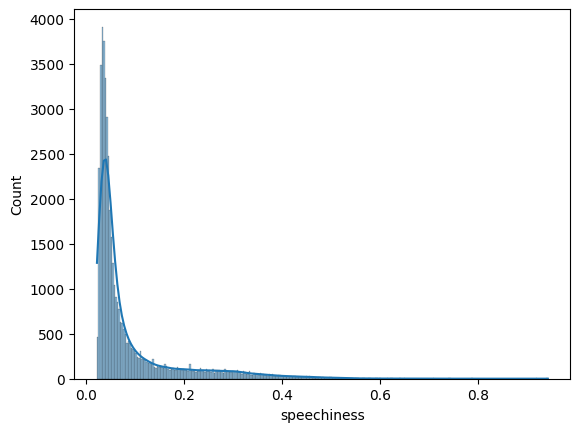

In [53]:
sns.histplot(data=df_cp_tratado, x="speechiness",kde=True)

<Axes: xlabel='speechiness', ylabel='Count'>

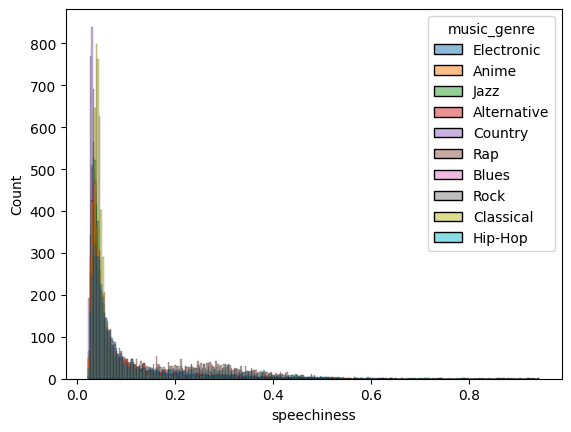

In [54]:
sns.histplot(data=df_cp_tratado, x="speechiness", hue="music_genre")



<Axes: xlabel='instrumentalness', ylabel='Count'>

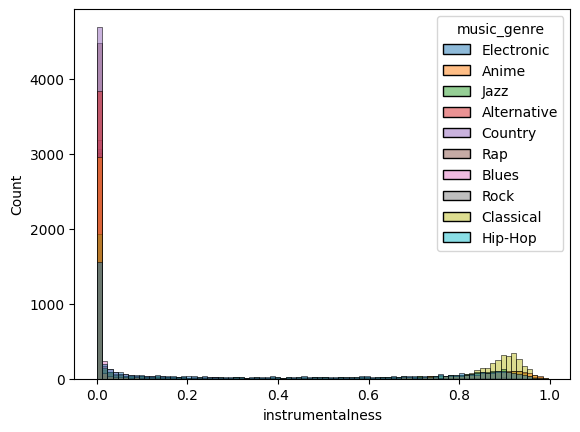

In [55]:
sns.histplot(data=df_cp_tratado, x="instrumentalness", hue="music_genre")


<Axes: xlabel='energy', ylabel='Count'>

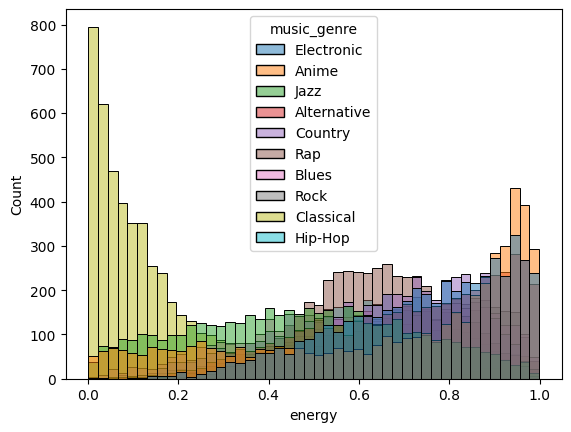

In [56]:
sns.histplot(data=df_cp_tratado, x="energy", hue="music_genre")

<Axes: xlabel='danceability', ylabel='Count'>

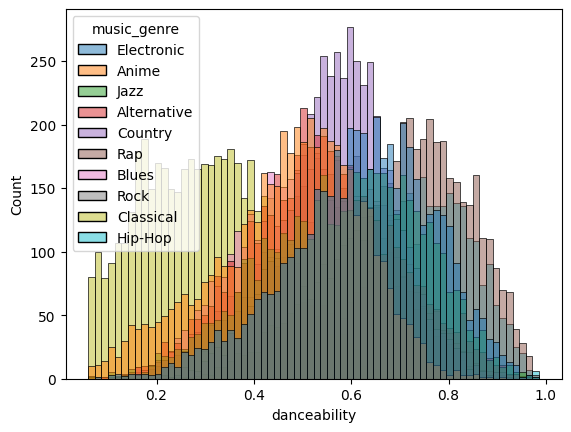

In [50]:
sns.histplot(data=df_cp_tratado, x="danceability", hue="music_genre")

<Axes: xlabel='loudness', ylabel='Count'>

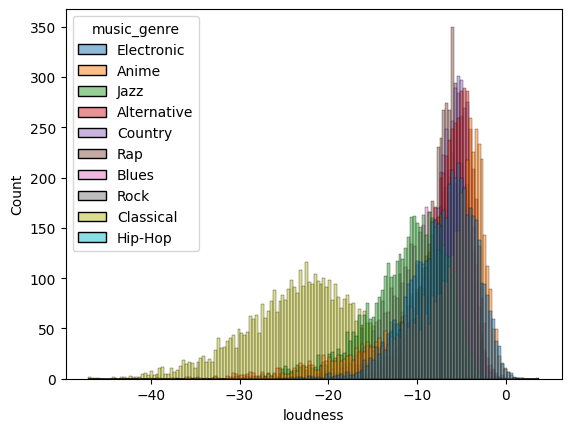

In [51]:
sns.histplot(data=df_cp_tratado, x="loudness", hue="music_genre")

<Axes: xlabel='duration_ms', ylabel='Count'>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


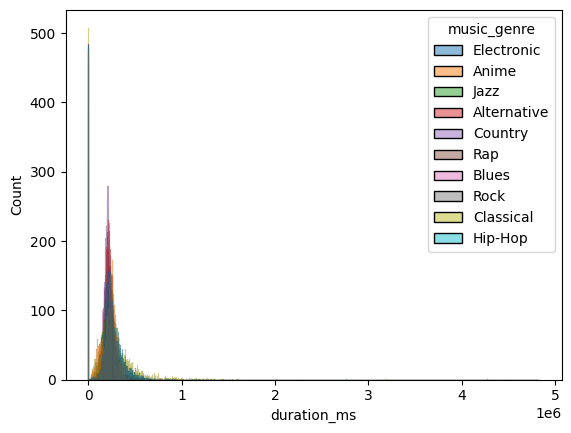

In [52]:
sns.histplot(data=df_cp_tratado, x="duration_ms", hue="music_genre")


<Axes: xlabel='popularity', ylabel='Count'>

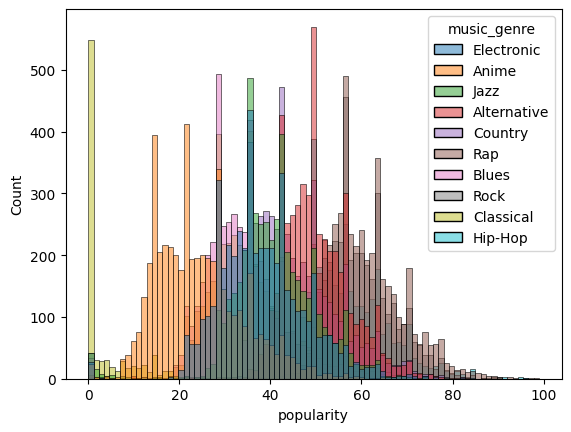

In [53]:
sns.histplot(data=df_cp_tratado, x="popularity", hue="music_genre")


<Axes: xlabel='liveness', ylabel='Count'>

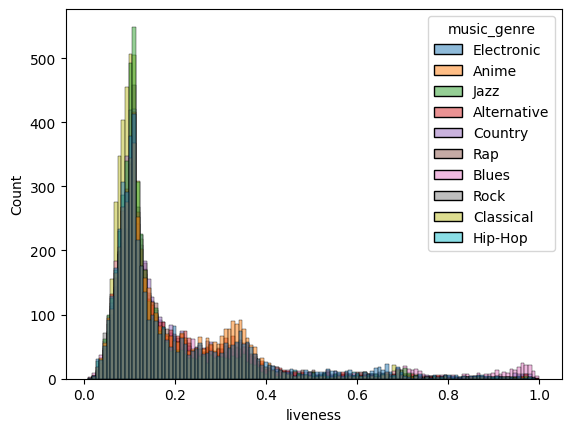

In [54]:
sns.histplot(data=df_cp_tratado, x="liveness", hue="music_genre")


<Axes: xlabel='acousticness', ylabel='Count'>

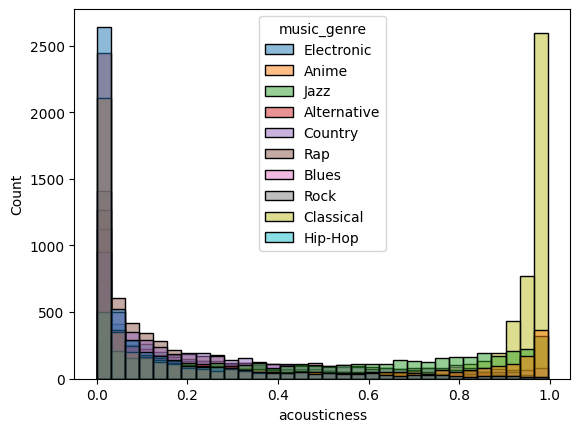

In [108]:
sns.histplot(data=df_cp_tratado, x="acousticness", hue="music_genre")


### Boxplot

O boxplot é uma representação gráfica resumida da distribuição de um conjunto de dados numéricos. Ele ajuda a visualizar:

- A dispersão dos dados
- A mediana (valor central)
- A presença de outliers
- O alcance interquartil (o "meio" dos dados)
- A simetria ou assimetria da distribuição

#### 🧠 Como interpretar um boxplot?


Um boxplot é composto por:
- Q1 (1º quartil / 25%): 25% dos dados estão abaixo desse valor
- Q2 (mediana / 50%): valor que divide o conjunto ao meio
- Q3 (3º quartil / 75%): 75% dos dados estão abaixo desse valor
- A caixa representa o intervalo interquartil (IQR) = Q3 - Q1
- Bigodes (whiskers): limites inferiores e superiores dos dados "normais" (geralmente Q1 - 1.5×IQR e Q3 + 1.5×IQR)
- Pontos fora dos bigodes são os outliers

<Axes: xlabel='acousticness'>

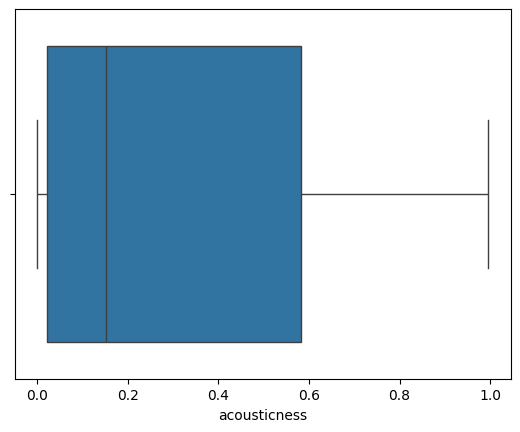

In [57]:
sns.boxplot(data=df_cp_tratado, x="acousticness")

<Axes: xlabel='liveness'>

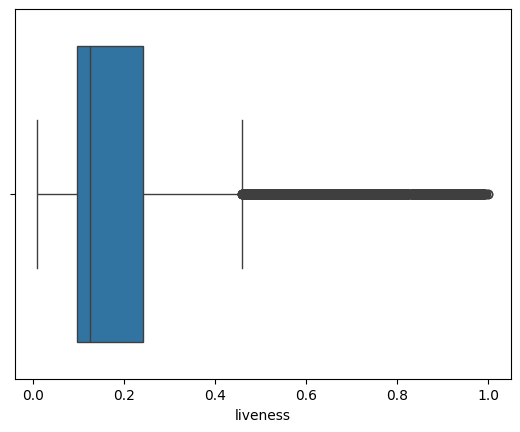

In [58]:
sns.boxplot(data=df_cp_tratado, x="liveness")

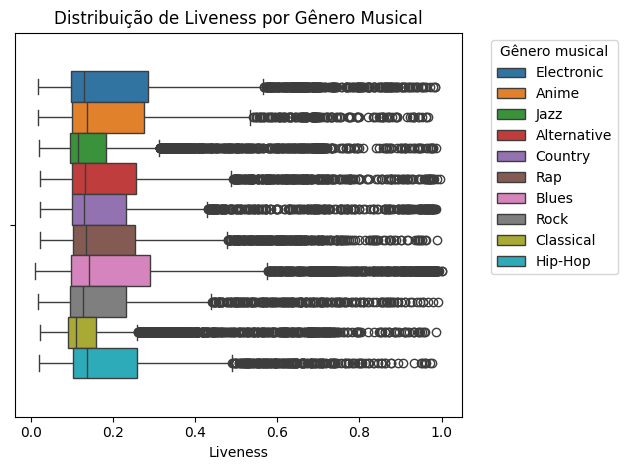

In [59]:
sns.boxplot(data=df_cp_tratado, x="liveness",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de Liveness por Gênero Musical')
plt.xlabel('Liveness')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


<Axes: xlabel='popularity'>

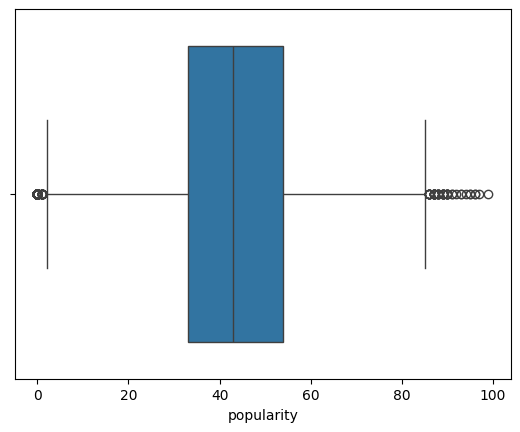

In [66]:
sns.boxplot(data=df_cp_tratado, x="popularity")

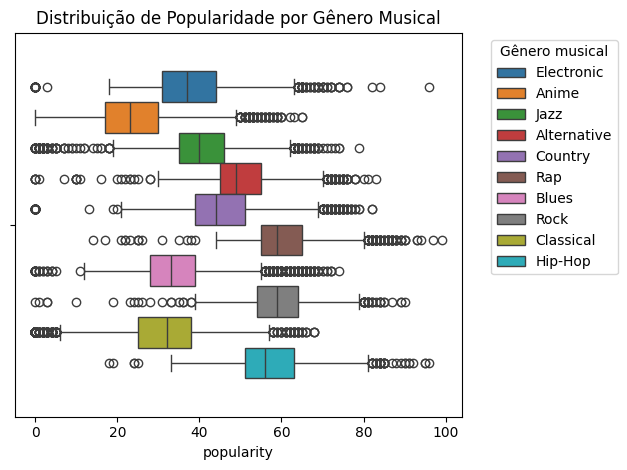

In [57]:
sns.boxplot(data=df_cp_tratado, x="popularity",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de Popularidade por Gênero Musical')
plt.xlabel('popularity')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


<Axes: xlabel='loudness'>

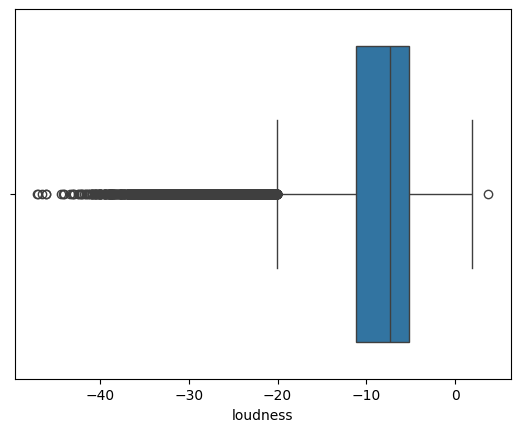

In [73]:
sns.boxplot(data=df_cp_tratado, x="loudness")

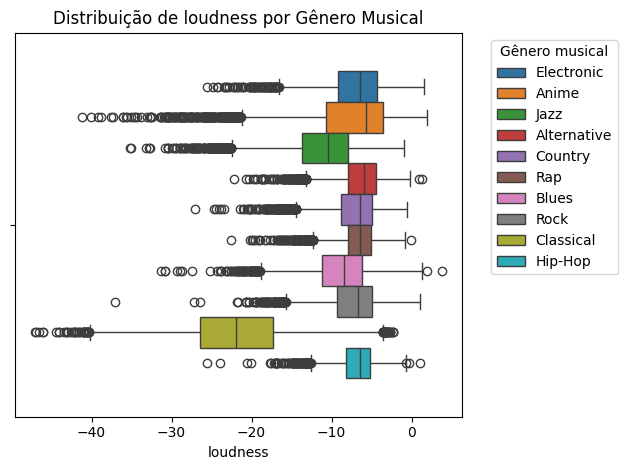

In [59]:
sns.boxplot(data=df_cp_tratado, x="loudness",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de loudness por Gênero Musical')
plt.xlabel('loudness')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


<Axes: xlabel='danceability'>

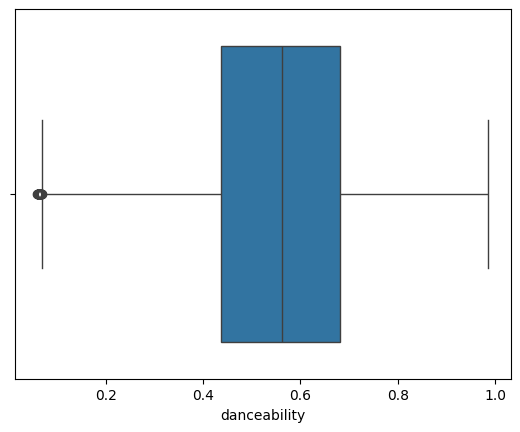

In [75]:
sns.boxplot(data=df_cp_tratado, x="danceability")

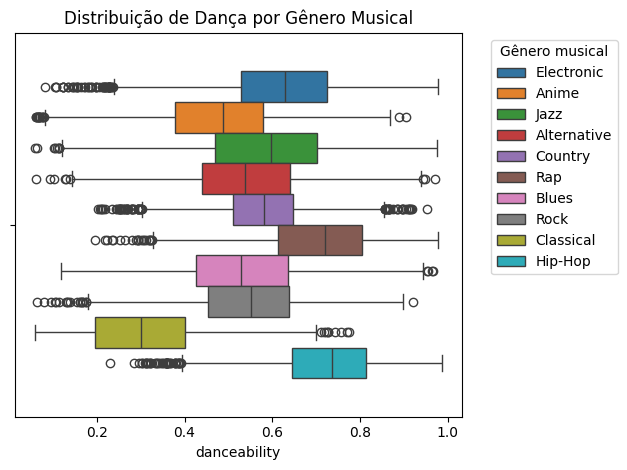

In [60]:
sns.boxplot(data=df_cp_tratado, x="danceability",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de Dança por Gênero Musical')
plt.xlabel('danceability')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


<Axes: xlabel='duration_ms'>

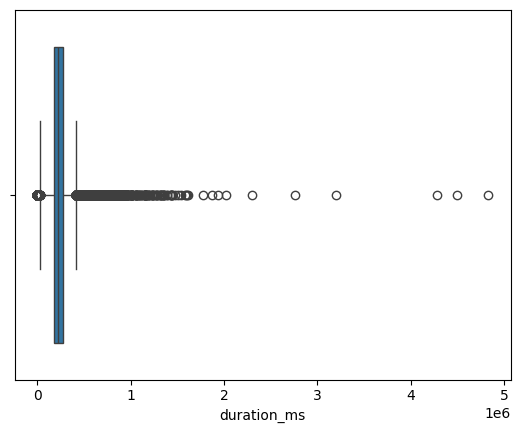

In [76]:
sns.boxplot(data=df_cp_tratado, x="duration_ms")

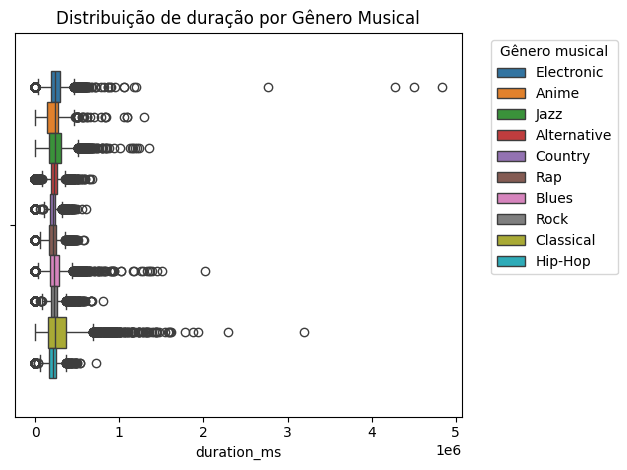

In [77]:
sns.boxplot(data=df_cp_tratado, x="duration_ms",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de duração por Gênero Musical')
plt.xlabel('duration_ms')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


<Axes: xlabel='energy'>

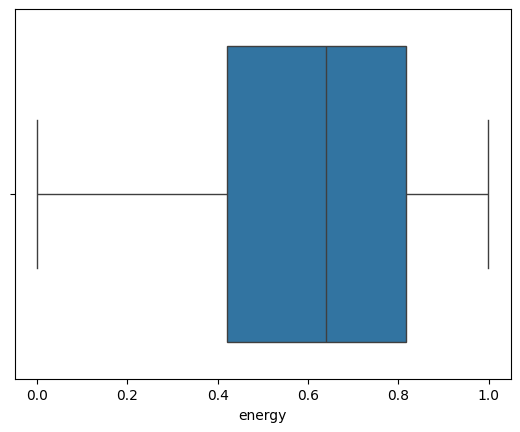

In [82]:
sns.boxplot(data=df_cp_tratado, x="energy")

<Axes: xlabel='instrumentalness'>

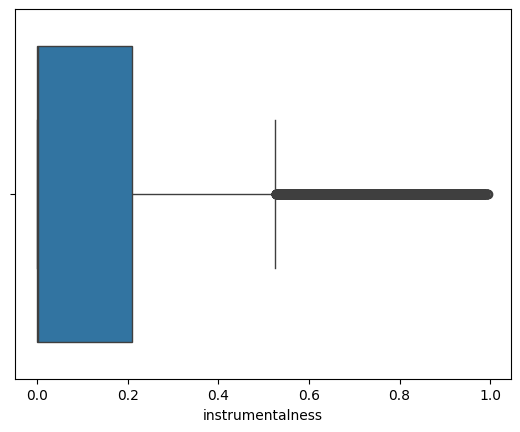

In [83]:
sns.boxplot(data=df_cp_tratado, x="instrumentalness")

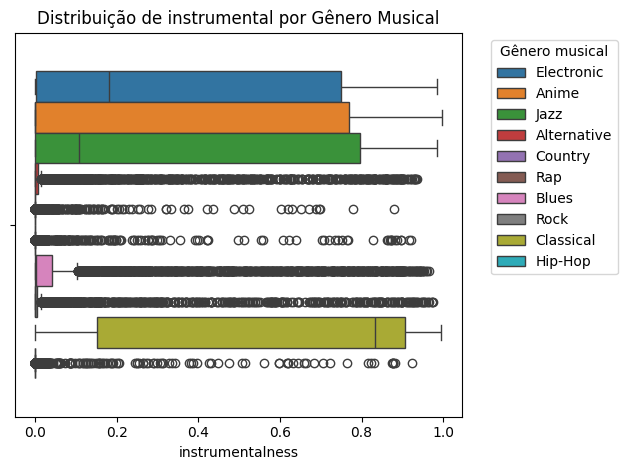

In [88]:
sns.boxplot(data=df_cp_tratado, x="instrumentalness",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de instrumental por Gênero Musical')
plt.xlabel('instrumentalness')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


<Axes: xlabel='speechiness'>

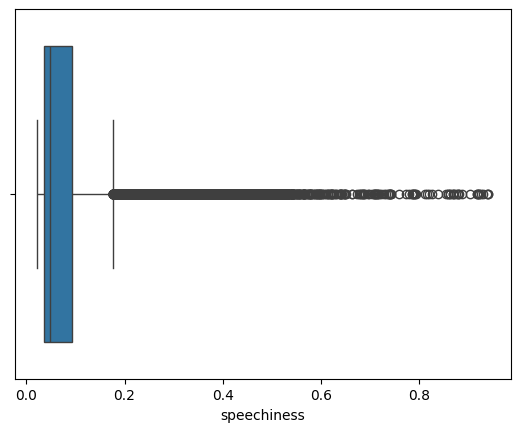

In [87]:
sns.boxplot(data=df_cp_tratado, x="speechiness")

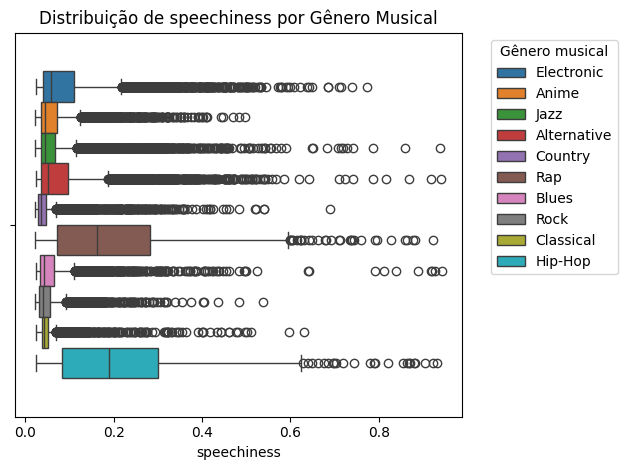

In [89]:
sns.boxplot(data=df_cp_tratado, x="speechiness",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de speechiness por Gênero Musical')
plt.xlabel('speechiness')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


<Axes: xlabel='valence'>

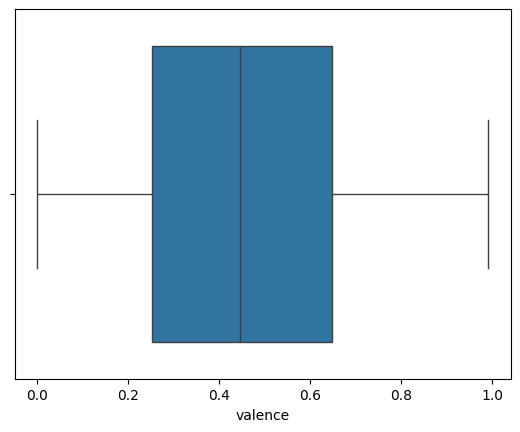

In [120]:
sns.boxplot(data=df_cp_tratado, x="valence")

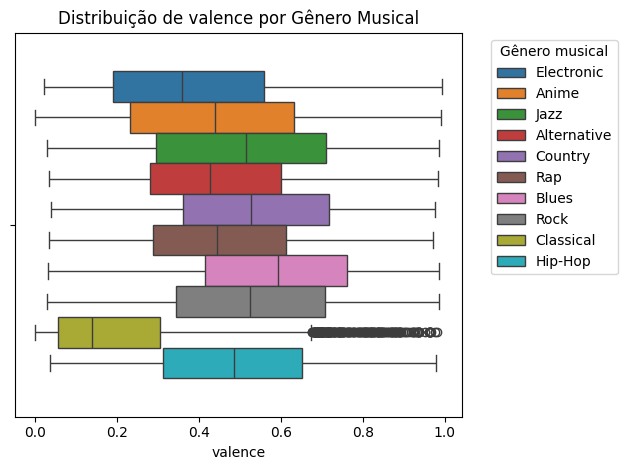

In [119]:
sns.boxplot(data=df_cp_tratado, x="valence",hue="music_genre")

plt.legend(title='Gênero musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribuição de valence por Gênero Musical')
plt.xlabel('valence')
plt.tight_layout()  # ajusta o layout para não cortar nada
plt.show()


### Removendo os dados através do IQR

O Intervalo Interquartil (IQR), também conhecido como amplitude interquartil, é uma medida de dispersão estatística que indica a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) de um conjunto de dados. Em outras palavras, o IQR representa a extensão da metade central dos dados, excluindo os extremos.

In [60]:
# Cálculo dos quartis
def removendo_outliers_iqr(df,coluna):
  Q1 = df[coluna].quantile(0.25)
  Q3 = df[coluna].quantile(0.75)
  IQR = Q3 - Q1

  # Limites para considerar um valor como outlier
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrando os dados para remover os outliers
  df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

  print("Antes:", df.shape[0], "linhas")
  print("Depois:", df_sem_outliers.shape[0], "linhas")
  return df_sem_outliers

In [61]:
df_tratado = removendo_outliers_iqr(df_cp_tratado,"liveness")

Antes: 46165 linhas
Depois: 43118 linhas


<Axes: xlabel='liveness'>

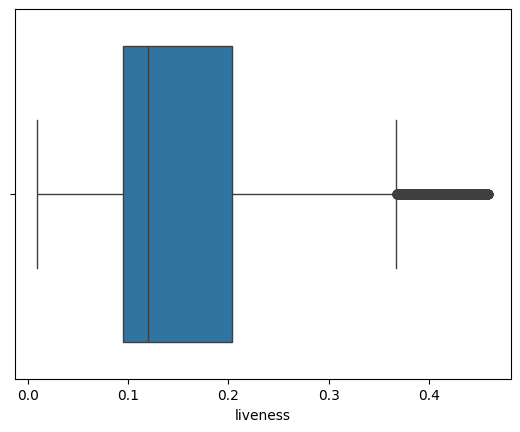

In [62]:
sns.boxplot(data=df_tratado, x="liveness")

In [63]:
df_sem_outliers2 = removendo_outliers_iqr(df_preenchid_tratado,"liveness")

Antes: 46166 linhas
Depois: 43119 linhas


In [64]:
df_tratado = removendo_outliers_iqr(df_tratado,"popularity")

Antes: 43118 linhas
Depois: 42474 linhas


In [65]:
df_sem_outliers2 = removendo_outliers_iqr(df_sem_outliers2,"popularity")

Antes: 43119 linhas
Depois: 42475 linhas


In [66]:
df_tratado = removendo_outliers_iqr(df_tratado,"loudness")

Antes: 42474 linhas
Depois: 39138 linhas


In [67]:
df_sem_outliers2 = removendo_outliers_iqr(df_sem_outliers2,"loudness")

Antes: 42475 linhas
Depois: 39139 linhas


In [68]:
df_tratado = removendo_outliers_iqr(df_tratado,"duration_ms")

Antes: 39138 linhas
Depois: 33723 linhas


In [69]:
df_sem_outliers2 = removendo_outliers_iqr(df_sem_outliers2,"duration_ms")

Antes: 39139 linhas
Depois: 33724 linhas


<Axes: xlabel='duration_ms'>

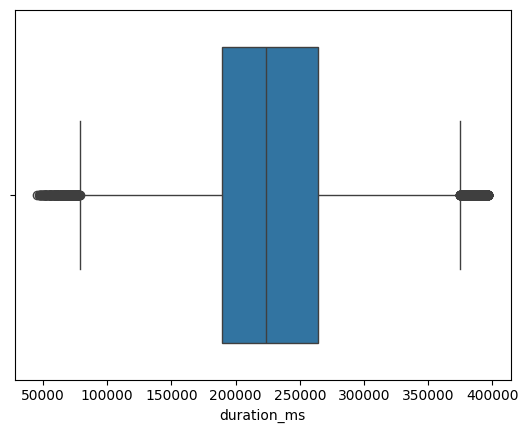

In [70]:
sns.boxplot(data=df_tratado, x="duration_ms")

In [250]:
df_tratado = removendo_outliers_iqr(df_tratado,"instrumentalness")

Antes: 33723 linhas
Depois: 26370 linhas


In [251]:
df_sem_outliers2 = removendo_outliers_iqr(df_sem_outliers2,"instrumentalness")

Antes: 33724 linhas
Depois: 26370 linhas


In [252]:
df_tratado = removendo_outliers_iqr(df_tratado,"speechiness")

Antes: 26370 linhas
Depois: 23140 linhas


In [253]:
df_sem_outliers2 = removendo_outliers_iqr(df_sem_outliers2,"speechiness")

Antes: 26370 linhas
Depois: 23140 linhas


<Axes: xlabel='speechiness'>

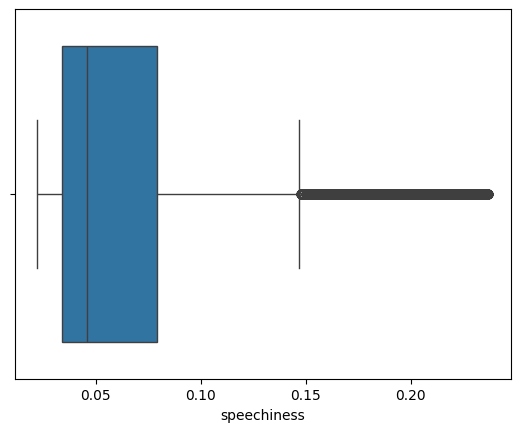

In [254]:
sns.boxplot(data=df_tratado, x="speechiness")

## ✅ Normalização e Padronização

In [255]:
df_tratado.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic
10,49030.0,Chase & Status,Lost & Not Found - Acoustic,30.0,0.85500,0.607,170463.0,0.158,0.000000,F#,0.1060,-13.787,Minor,0.0345,57.528,4-Apr,0.307,Electronic
12,69056.0,Champagne Drip,Satellite (Feat. Len X),31.0,0.01600,0.660,236089.0,0.892,0.000605,C,0.1630,-3.464,Major,0.0645,128.043,4-Apr,0.111,Electronic
17,54696.0,Dillon Francis,Without You - The Rebirth,29.0,0.15800,0.660,266282.0,0.784,0.000279,C,0.0978,-4.396,Minor,0.0571,127.958,3-Apr,0.622,Electronic
18,49375.0,The Bloody Beetroots,Irreversible (feat. Anders Friden),35.0,0.00006,0.259,185333.0,0.687,0.008620,G#,0.3380,-3.231,Major,0.0413,135.532,4-Apr,0.114,Electronic


Podemos notar que os dados seguem distribuições diferentes. Portanto vamos precisar deixar todos na mesma escala caso o objetivo seja fornecer como entrada para um modelo de Machine learning. Existem duas formas para fazer isso: Padronização e Normalização

A escolha entre normalização e padronização (ou escore Z) depende do **contexto** e das **características** dos seus dados. A **normalização** é útil quando você precisa manter os dados **dentro de um determinado intervalo (como 0 e 1)** e **não presume a distribuição dos dados**. Já a **padronização** é mais indicada quando se sabe que os dados **seguem uma distribuição normal** ou gaussiana e quando o modelo de Machine Learning **assume uma distribuição normal**.

P.S: No caso do nosso conjunto de dados iremos utilizar a normalização, dado que nem todas as variáveise seguem uma distribuição normal

#### 📐 Normalização (Min-Max Scaling)

O que faz? Reduz os valores para uma faixa entre 0 e 1 (ou -1 e 1).

Quando usar?
- Quando os dados não seguem distribuição normal.
- Quando valores mínimos e máximos são relevantes.
- Em algoritmos sensíveis a escalas, como:
- KNN
- Redes Neurais
- Regressão Logística
- SVM

In [71]:
#verificando a distribuição dos dados de algumas colunas
print(f' Limite minimo {df_tratado.acousticness.min()} e limite máximo {df_tratado.acousticness.max()} da variável acousticness')
print(f' Limite minimo {df_tratado.danceability.min()} e limite máximo {df_tratado.danceability.max()} da variável danceability')
print(f' Limite minimo {df_tratado.energy.min()} e limite máximo {df_tratado.energy.max()} da variável energy')
print(f' Limite minimo {df_tratado.instrumentalness.min()} e limite máximo {df_tratado.instrumentalness.max()} da variável instrumentalness')
print(f' Limite minimo {df_tratado.liveness.min()} e limite máximo {df_tratado.liveness.max()} da variável liveness')
print(f' Limite minimo {df_tratado.speechiness.min()} e limite máximo {df_tratado.speechiness.max()} da variável speechiness')
print(f' Limite minimo {df_tratado.valence.min()} e limite máximo {df_tratado.valence.max()} da variável valence')

 Limite minimo 0.0 e limite máximo 0.996 da variável acousticness
 Limite minimo 0.0602 e limite máximo 0.986 da variável danceability
 Limite minimo 0.0158 e limite máximo 0.999 da variável energy
 Limite minimo 0.0 e limite máximo 0.996 da variável instrumentalness
 Limite minimo 0.00967 e limite máximo 0.4589999999999999 da variável liveness
 Limite minimo 0.0223 e limite máximo 0.922 da variável speechiness
 Limite minimo 0.0267 e limite máximo 0.992 da variável valence


Todas as variáveis acima estão com a distribuição entre 0 e 1. Portanto não precisamos aplicar a normalização neles, então vamos aplicar nas outras colunas

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_tratado[['popularity_norm']] = scaler.fit_transform(df_tratado[['popularity']])

In [73]:
df_tratado[['popularity_norm','popularity']]

,popularity_norm,popularity
1,0.349398,31.0
3,0.385542,34.0
4,0.361446,32.0
6,0.530120,46.0
8,0.445783,39.0
...,...,...
49996,0.662651,57.0
49999,0.650602,56.0
50001,0.843373,72.0
50002,0.590361,51.0


In [74]:
df_sem_outliers2[['popularity_norm']] = scaler.fit_transform(df_sem_outliers2[['popularity']])

In [75]:
df_tratado[['duration_ms_norm']] = scaler.fit_transform(df_tratado[['duration_ms']])
df_sem_outliers2[['duration_ms_norm']] = scaler.fit_transform(df_sem_outliers2[['duration_ms']])

In [76]:
df_tratado[['duration_ms_norm','duration_ms']]

,duration_ms_norm,duration_ms
1,0.491626,218293.0
3,0.345191,166875.0
4,0.503234,222369.0
6,0.480561,214408.0
8,0.703816,292800.0
...,...,...
49996,0.525385,230147.0
49999,0.546801,237667.0
50001,0.587222,251860.0
50002,0.409577,189483.0


In [77]:
df_tratado[['loudness_norm']] = scaler.fit_transform(df_tratado[['loudness']])
df_sem_outliers2[['loudness_norm']] = scaler.fit_transform(df_sem_outliers2[['loudness']])

In [78]:
df_tratado[['tempo_norm']] = scaler.fit_transform(df_tratado[['tempo']])
df_sem_outliers2[['tempo_norm']] = scaler.fit_transform(df_sem_outliers2[['tempo']])

<Axes: xlabel='popularity_norm', ylabel='Count'>

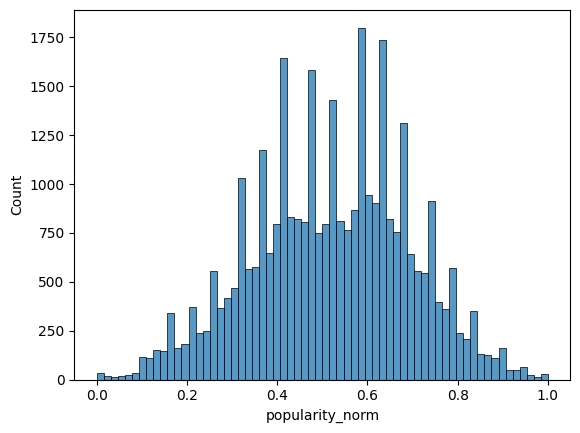

In [81]:
sns.histplot(data=df_tratado, x="popularity_norm")


<Axes: xlabel='popularity', ylabel='Count'>

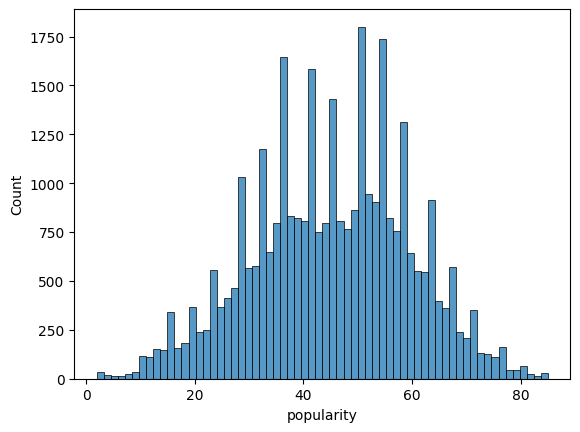

In [82]:
sns.histplot(data=df_tratado, x="popularity")


## 🔢 Transformar informações categóricas em numéricas (Encoding)

Encoding (ou codificação, em português) é o processo de transformar variáveis categóricas em números, para que elas possam ser utilizadas por algoritmos de machine learning, que geralmente só trabalham com valores numéricos.

🎯 Tipos mais comuns de Encoding:
- Label Encoding: Usado quando a variável é ordinal (tem ordem): Ex: Baixo, Médio, Alto
- One-Hot Encoding: Usado para variáveis nominais (sem ordem): Ex: Cor, Cidade, Gênero

No nosso conjunto de dados há 3 variáveis categóricas que podemos trabalhar:
- mode
- key
- music_genre

In [85]:
df_tratado.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,mode,speechiness,tempo,obtained_date,valence,music_genre,popularity_norm,duration_ms_norm,loudness_norm,tempo_norm
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,...,Minor,0.0300,115.002,4-Apr,0.531,Electronic,0.349398,0.491626,0.585641,0.432519
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,...,Major,0.2390,128.014,4-Apr,0.270,Electronic,0.385542,0.345191,0.702917,0.502660
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,...,Major,0.0413,145.036,4-Apr,0.323,Electronic,0.361446,0.503234,0.621446,0.594418
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,...,Major,0.3510,149.995,4-Apr,0.230,Electronic,0.530120,0.480561,0.712317,0.621149
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,...,Minor,0.2680,149.948,4-Apr,0.273,Electronic,0.445783,0.703816,0.763882,0.620896


In [83]:
df_tratado.mode.unique()

AttributeError: 'function' object has no attribute 'unique'

O nome dessa coluna é uma palavra reservada do python. Então precisamos renomea-la para qualquer outro nome, portanto sempre preste atenção nos nomes que você dá para as colunas ;)

In [86]:
df_tratado.rename(columns={'mode':'tom'},inplace=True)

In [87]:
df_sem_outliers2.rename(columns={'mode':'tom'},inplace=True)

Vamos explorar quais tipos existem atualmente para entender se seguem uma ordem (maior e menor) ou não

In [88]:
df_tratado.tom.unique()

array(['Minor', 'Major'], dtype=object)

In [89]:
df_tratado.key.unique()

array(['D', 'C#', 'F#', 'B', 'F', 'A', 'C', 'G', 'G#', 'A#', 'E', 'D#'],
      dtype=object)

In [90]:
df_tratado.music_genre.unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

Dessas explorações podemos ver que apenas a coluna Tom segue uma ordem, já as outras variáveis não há uma ordem de maior e menor. Portanto iremos usar estratégias diferentes

##### Label Enconding

Indicamos o uso dessa técnica quando as variáveis seguem uma ordem de grandeza

In [91]:
from sklearn.preprocessing import LabelEncoder


In [92]:
# Label Encoding
le = LabelEncoder()
df_tratado['tom_tratado'] = le.fit_transform(df_tratado['tom'])

In [93]:
df_tratado[['tom_tratado','tom']]

,tom_tratado,tom
1,1,Minor
3,0,Major
4,0,Major
6,0,Major
8,1,Minor
...,...,...
49996,0,Major
49999,0,Major
50001,0,Major
50002,0,Major


##### One Hot Encoding


In [273]:
# One-Hot Encoding
pd.get_dummies(df_tratado['key'], prefix='key')

,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
9,True,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,True,False,False
12,False,False,False,True,False,False,False,False,False,False,False,False
17,False,False,False,True,False,False,False,False,False,False,False,False
18,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False,False
49999,False,False,False,True,False,False,False,False,False,False,False,False
50001,False,False,True,False,False,False,False,False,False,False,False,False
50002,False,False,False,False,False,True,False,False,False,False,False,False


In [94]:
key_dummies = pd.get_dummies(df_tratado['key'], prefix='key',dtype=int)
df_tratado = pd.concat([df_tratado.drop('key', axis=1), key_dummies], axis=1)


In [95]:
df_tratado.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.124,...,0,0,0,1,0,0,0,0,0,0
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.157,...,0,0,1,0,0,0,0,0,0,0
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.157,...,0,0,0,0,0,0,0,1,0,0
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.106,...,1,0,0,0,0,0,0,0,0,0
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.178,...,0,0,0,0,0,0,1,0,0,0


In [96]:
df_tratado.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'tom', 'speechiness',
       'tempo', 'obtained_date', 'valence', 'music_genre', 'popularity_norm',
       'duration_ms_norm', 'loudness_norm', 'tempo_norm', 'tom_tratado',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#'],
      dtype='object')

Com o uso do One Hot 1 coluna virou 12 colunas a mais. Então tome cuidado com a quantidade de colunas extras a serem geradas

In [97]:
music_genre_dummies = pd.get_dummies(df_tratado['music_genre'], prefix='genre',dtype=int)
df_tratado = pd.concat([df_tratado.drop('music_genre', axis=1), music_genre_dummies], axis=1)


In [98]:
df_tratado.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'tom', 'speechiness',
       'tempo', 'obtained_date', 'valence', 'popularity_norm',
       'duration_ms_norm', 'loudness_norm', 'tempo_norm', 'tom_tratado',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'genre_Alternative',
       'genre_Anime', 'genre_Blues', 'genre_Classical', 'genre_Country',
       'genre_Electronic', 'genre_Hip-Hop', 'genre_Jazz', 'genre_Rap',
       'genre_Rock'],
      dtype='object')

In [99]:
music_genre_dummies2 = pd.get_dummies(df_sem_outliers2['music_genre'], prefix='key',dtype=int)
df_sem_outliers2 = pd.concat([df_sem_outliers2.drop('music_genre', axis=1), music_genre_dummies2], axis=1)




---



## Agradecimentos

✨ E é isso, meninas! Desejo muito sucesso nessa jornada para cada uma de vocês. Qualquer dúvida, não deixem de usar os fóruns e trocar ideias com outras alunas — aprender em rede é sempre mais potente! 💬💡

Abraços,
@laura_data_talks